In [1]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# Reading the train.csv which includes the data which we have to train.It will be used for model building.
train_csv=pd.read_csv('train.csv')

In [3]:
# Reading the test.csv which includes the data which we have to test.It will be used for testing our model.
test_csv=pd.read_csv('test.csv')

In [4]:
# displaying the train.csv file
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
#Now We need to do analysis on the data train_csv. so we need to remove some columns which are relevant for our model building.
#Such as Ticket, Name , Fare from  test and train datasets.  

In [7]:
train_csv1=train_csv.drop(columns=['Ticket','Name','Fare'])
test_csv1=test_csv.drop(columns=['Ticket','Name','Fare'])

In [8]:
train_csv1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,NaN,S
887,888,1,1,female,19.0,0,0,B42,S
888,889,0,3,female,NaN,1,2,NaN,S
889,890,1,1,male,26.0,0,0,C148,C


In [9]:
train_csv1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#dealing with nan values of train data for model building
#since age is having 177 we need take average of all the ages the make changes.
mean_ages=int(train_csv1.Age.mean())
train_csv1.Age.fillna(mean_ages,inplace=True)
#Now for cabin we can drop the column
train_csv1.drop(columns=['Cabin'],inplace=True)
#now embarked as only 2 null values we can removes those rows.
train_csv1.dropna(inplace=True)

In [11]:
# dealing with nan values for test data for model building
#since age is having 177 we need take average of all the ages the make changes.
mean_ages=int(test_csv1.Age.mean())
test_csv1.Age.fillna(mean_ages,inplace=True)
#Now for cabin we can drop the column
test_csv1.drop(columns=['Cabin'],inplace=True)
#now embarked as only 2 null values we can removes those rows.
test_csv1.dropna(inplace=True)

In [12]:
#We have finally preapared the data for analysis.

# Univariant Analysis

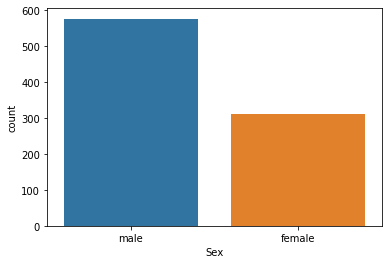

In [13]:
sns.countplot('Sex',data=train_csv1)

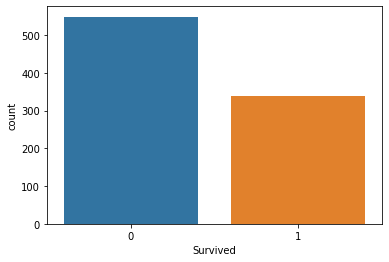

In [14]:
sns.countplot('Survived',data=train_csv1)

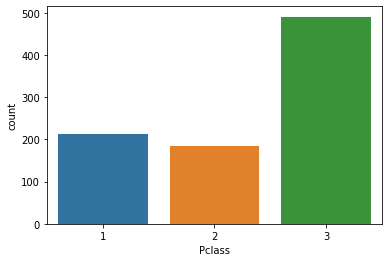

In [15]:
sns.countplot('Pclass',data=train_csv1)

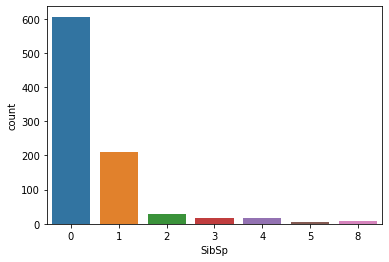

In [16]:
sns.countplot('SibSp',data=train_csv1)

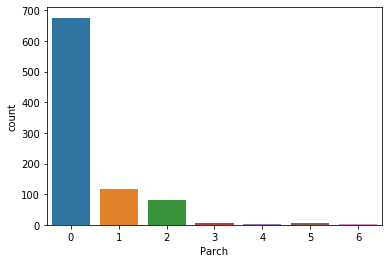

In [17]:
sns.countplot('Parch',data=train_csv1)

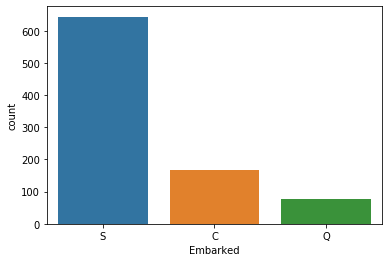

In [18]:
sns.countplot('Embarked',data=train_csv1)

# Bivariant Analysis

In [19]:
group_by_gender=train_csv1.groupby('Sex').count()

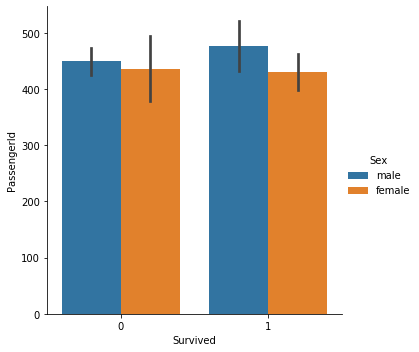

In [20]:
sns.catplot(x='Survived',y='PassengerId',hue="Sex",data=train_csv1,kind='bar')

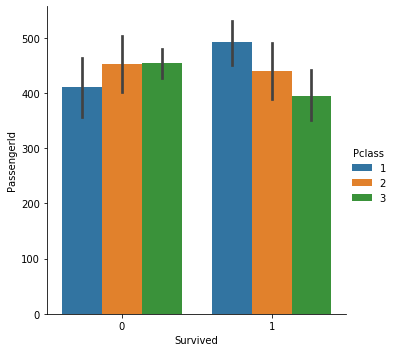

In [21]:
sns.catplot(x='Survived',y='PassengerId',hue="Pclass",data=train_csv1,kind='bar')

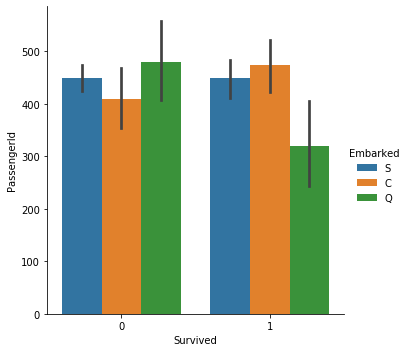

In [22]:
sns.catplot(x='Survived',y='PassengerId',hue="Embarked",data=train_csv1,kind='bar')

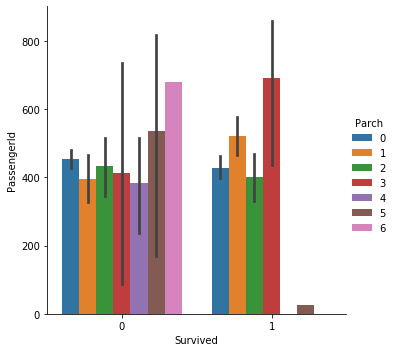

In [23]:
sns.catplot(x='Survived',y='PassengerId',hue="Parch",data=train_csv1,kind='bar')

# Preparing the data for model buiding

In [24]:
train_csv1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,29.0,1,2,S
889,890,1,1,male,26.0,0,0,C


In [25]:
X_train=train_csv1.drop(columns=['Survived'])
X_train=pd.get_dummies(X_train)
Y_train=train_csv1['Survived']

In [26]:
X_test=test_csv1
X_test=pd.get_dummies(X_test)

In [27]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)
model.score(X_train,Y_train)


0.39562755520345994

In [37]:
# decission tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
folds= KFold(n_splits=10,shuffle=True,random_state=0)
metric="accuracy"
model=DecisionTreeClassifier()
score= cross_val_score(model,X_train,Y_train,cv=folds,n_jobs=1,scoring=metric)
print(score)
#mean score rounded to 2 decimal points
round(np.mean(score)*100,2)

[0.62921348 0.69662921 0.79775281 0.71910112 0.70786517 0.70786517
 0.78651685 0.71910112 0.75280899 0.72727273]


72.44

In [29]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=10)
score= cross_val_score(model,X_train,Y_train,cv=folds,n_jobs=1,scoring=metric)
print(score)

[0.5505618  0.49438202 0.52808989 0.58426966 0.66292135 0.5505618
 0.56179775 0.59550562 0.53932584 0.5       ]


In [38]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
score= cross_val_score(model,X_train,Y_train,cv=folds,n_jobs=1,scoring=metric)
print(score)
#mean score rounded to 2 decimal points
round(np.mean(score)*100,2)

[0.71910112 0.7752809  0.85393258 0.74157303 0.79775281 0.83146067
 0.79775281 0.76404494 0.82022472 0.77272727]


78.74

In [31]:
# so we con conclude that random classifier gives best predictions score.we can use that model

In [36]:
model.fit(X_train,Y_train)
Y_test=model.predict(X_test)
model.score(X_train,Y_train)

1.0

In [33]:
#wrapping up into a  dataframe
submission=pd.DataFrame({"PassengerId": test_csv1["PassengerId"],"Survived":Y_test})

#convert to  csv
submission.to_csv("submission.csv",index=False)